In [1]:
### IMPORTS GENERAL MODULES
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from pylab import title, show
from scipy.constants import c,e
import sys
from sklearn.preprocessing import normalize

#IMPORT MODULES FOR LPA-TOOLS
sys.path.append('../')
from laser import laser_profiles as las
from elementary_processes import ionization as ion
from elementary_processes import potential as pot
from elementary_processes import program_tools as tools
from particles import particle_data as ptcl



### Input parameters 

In [2]:
#----------------
# LASER PARAMETER
#----------------

#Peak a0 of  the laser pulse
a0 = 2.

#Wavelength of the laser (in microns)
lambda_0 = 0.8

#Waist of the laser in the focus (in microns)
w0 = 22.

#Laser duration (in microns)
ctau = 10.1

#Laser focus (in microns)
zf = 50

#-------------------
# PARTICLE PARAMETER
#-------------------

#Max gas density (in 1/cm^3)
n = 1e24

#Amount of dope gas (in percent)
am_dope = 1.

#The used element (use the shortcuts: 'N' for nitrogen, 'Ar' for argon or 'Kr' for krypton)
element = 'N'

#The energy level that should get ionized (i.e. 6 corresponds to N5+ -> N6+)
ion_level = 6

#Energy of the ionized electrons after ionization (in Joule, standard = 0)
energy = 0*e


#---------------------
# SIMULATION PARAMETER
#---------------------

#Array over the laser pulse
zz = np.linspace(3*ctau,-3*ctau,1e6)



/home/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


---

### Calculations

In [7]:
#------------------------------------
# Calculate the ionization parameters
#------------------------------------

#Dope gas density
ne = n*am_dope/100

#Ionization potential 
U_i = ptcl.get_ion_energy(element,ion_level)

#ADK rate
prob = ion.ionization_probability(zz,U_i,a0,ctau)

#Ionization degree:
"""
NOTE: This function assumes, that ALL electrons have the same given kinetic energy after 
      ionization! For E = 0 this is a reliable approximation, since the most electrons
      will be born at rest.
"""
degree = ion.ionization_degree(zz,prob)

#Laser field
laser_osc_field = las.gaussian_osc_field(zz, a0,w0,ctau,zf,lambda_0)

#Laser envelope
laser_envelope = las.gaussian_a0(zz, a0,ctau)

#Wakefield
wake = pot.wakefield(zz,a0,ctau,ne)

#Trapping condition
condition = pot.condition_fullfilled(zz,a0,ctau,lambda_0,ne)



### Plots

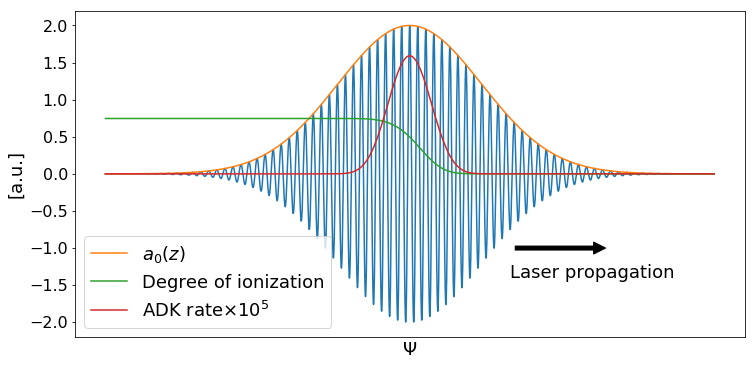

In [9]:
plt.figure(figsize=(12,6))
plt.plot(zz,laser_osc_field)
plt.plot(zz,laser_envelope,label='$a_0(z)$')
plt.plot(zz,degree,label='Degree of ionization')
plt.plot(zz,prob*1e5,label=r'ADK rate$\times 10^5$')

plt.legend(fontsize=18)

plt.xticks([])
plt.xlabel("$\Psi$", fontdict={'size':18})

plt.yticks(size=16)
plt.ylabel("[a.u.]",fontdict={'size':18})

plt.annotate('',xy=(20, -1), xytext=(10, -1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(10,-1.4,"Laser propagation", fontdict={'size':18})

plt.show()

---